# Libraries

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import csv
from collections import defaultdict

# Utility

In [97]:
def lineplot(x, y, **kwargs):
    plt.plot(x, y, **kwargs)

In [98]:
record_ls = []
def create_tidy_data(filepaths):
    for f in filepaths:
        with open('{}.csv'.format(f), newline='') as csvfile:
            fr = csv.reader(csvfile)
            count = 0
            header_dict = {}
            for row in fr:
                if count == 0:
                    for i in range(3,len(row)):
                        header_dict[i] = row[i]
                    count += 1
                    continue
                
                max_k = int(row[1])
                metric_ds = defaultdict(list)
                concept = row[0]
                method = f
                mrr = float(row[2])
                
                for i in range(3,len(row)):
                    
                    metric_k = header_dict[i]
                    metric = metric_k.split('@')[0]
                    k = int(metric_k.split('@')[1])
                    
                    if k > max_k:
                        break
                    metric_ds[k].append({'metric':metric,'value':float(row[i])})
                    
                #print(d)
                
                for key,value in metric_ds.items():
                    k = key
                    d = dict()
                    d = {'concept':concept,'method': method, 'MRR': mrr}
                    pair_ls = metric_ds[k]
                    for pl in pair_ls:
                        d[pl['metric']] = pl['value']
                    d['k'] = key
                    record_ls.append(d)
    df = pd.DataFrame(record_ls)
    return df           

In [116]:
def pivot_df(df_, measure_y, dimension_x, group):
    df_pivot = pd.pivot_table(
        df_,
        values=measure_y,
        index=dimension_x,
        columns=group,
        aggfunc=np.mean
    )
    return df_pivot

In [99]:
approaches = ['emb','LM_bert','emb_contrastive','combine']

# Load data

In [100]:
df = create_tidy_data(approaches)

In [101]:
print(df)

              concept   method       MRR         P         R        F1    k
0             company      emb  0.031118  1.000000  0.033333  0.064516    5
1             company      emb  0.031118  1.000000  0.066667  0.125000   10
2             company      emb  0.031118  1.000000  0.133333  0.235294   20
3             company      emb  0.031118  0.920000  0.306667  0.460000   50
4             company      emb  0.031118  0.580000  0.386667  0.464000  100
..                ...      ...       ...       ...       ...       ...  ...
372  onboarding_steps  combine  0.082622  0.400000  0.285714  0.333333   20
373  onboarding_steps  combine  0.082622  0.240000  0.428571  0.307692   50
374  onboarding_steps  combine  0.082622  0.180000  0.642857  0.281250  100
375  onboarding_steps  combine  0.082622  0.115000  0.821429  0.201754  200
376  onboarding_steps  combine  0.082622  0.083333  0.892857  0.152439  300

[377 rows x 7 columns]


# Generate Visualization

## Precision

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


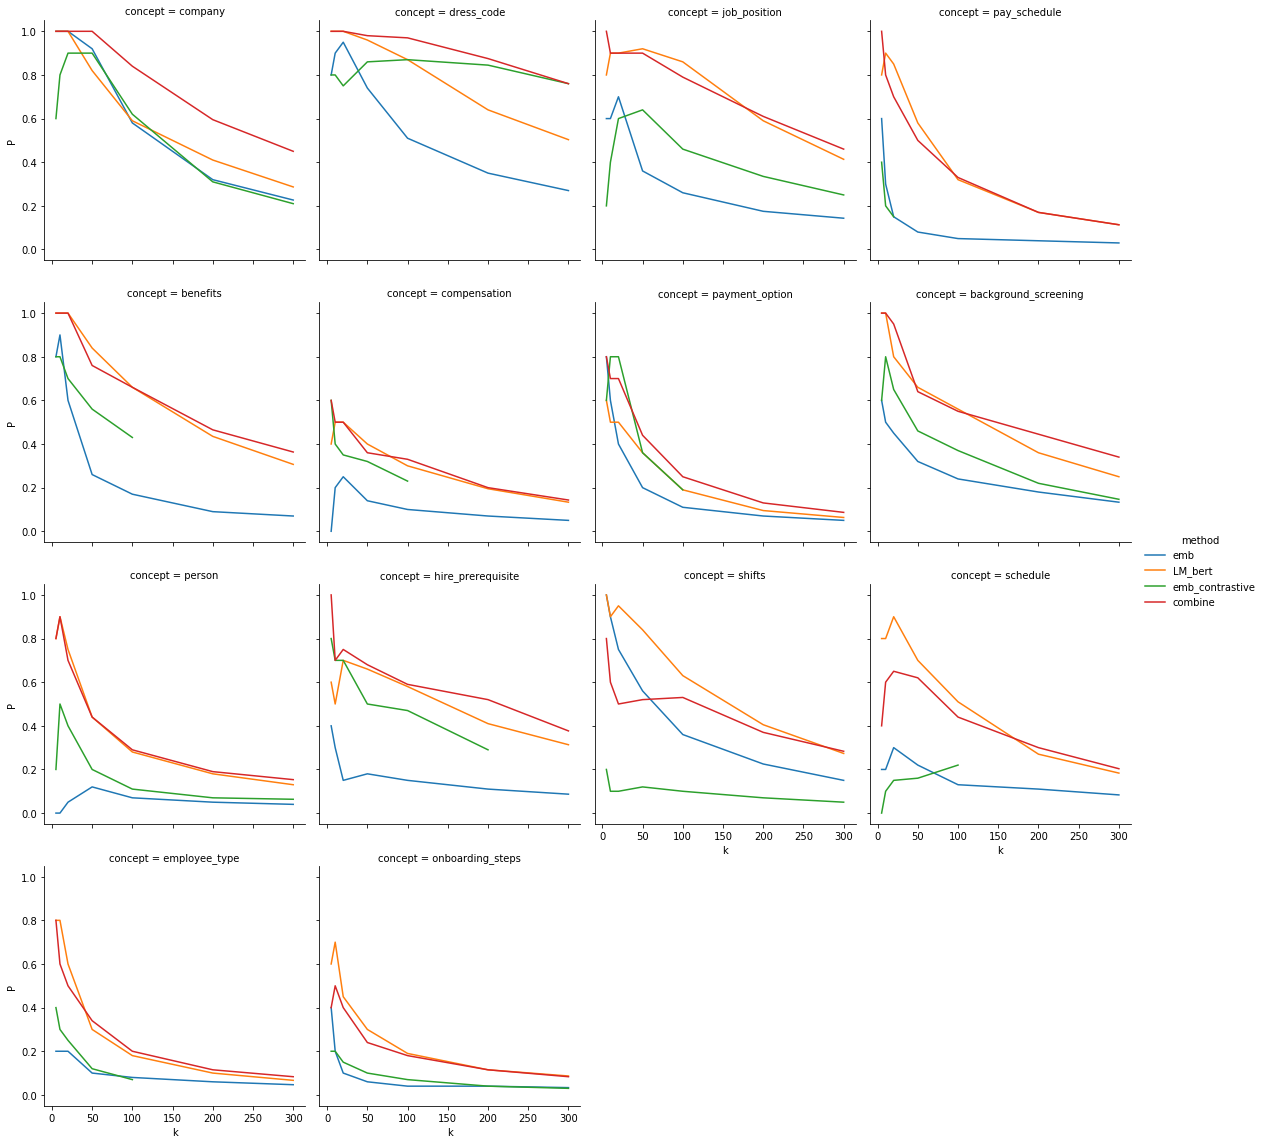

In [102]:
g = sns.FacetGrid(df, hue="method", col="concept", col_wrap=4, height=4)
g.map(lineplot, "k", "P")
g.add_legend()

## Recall

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


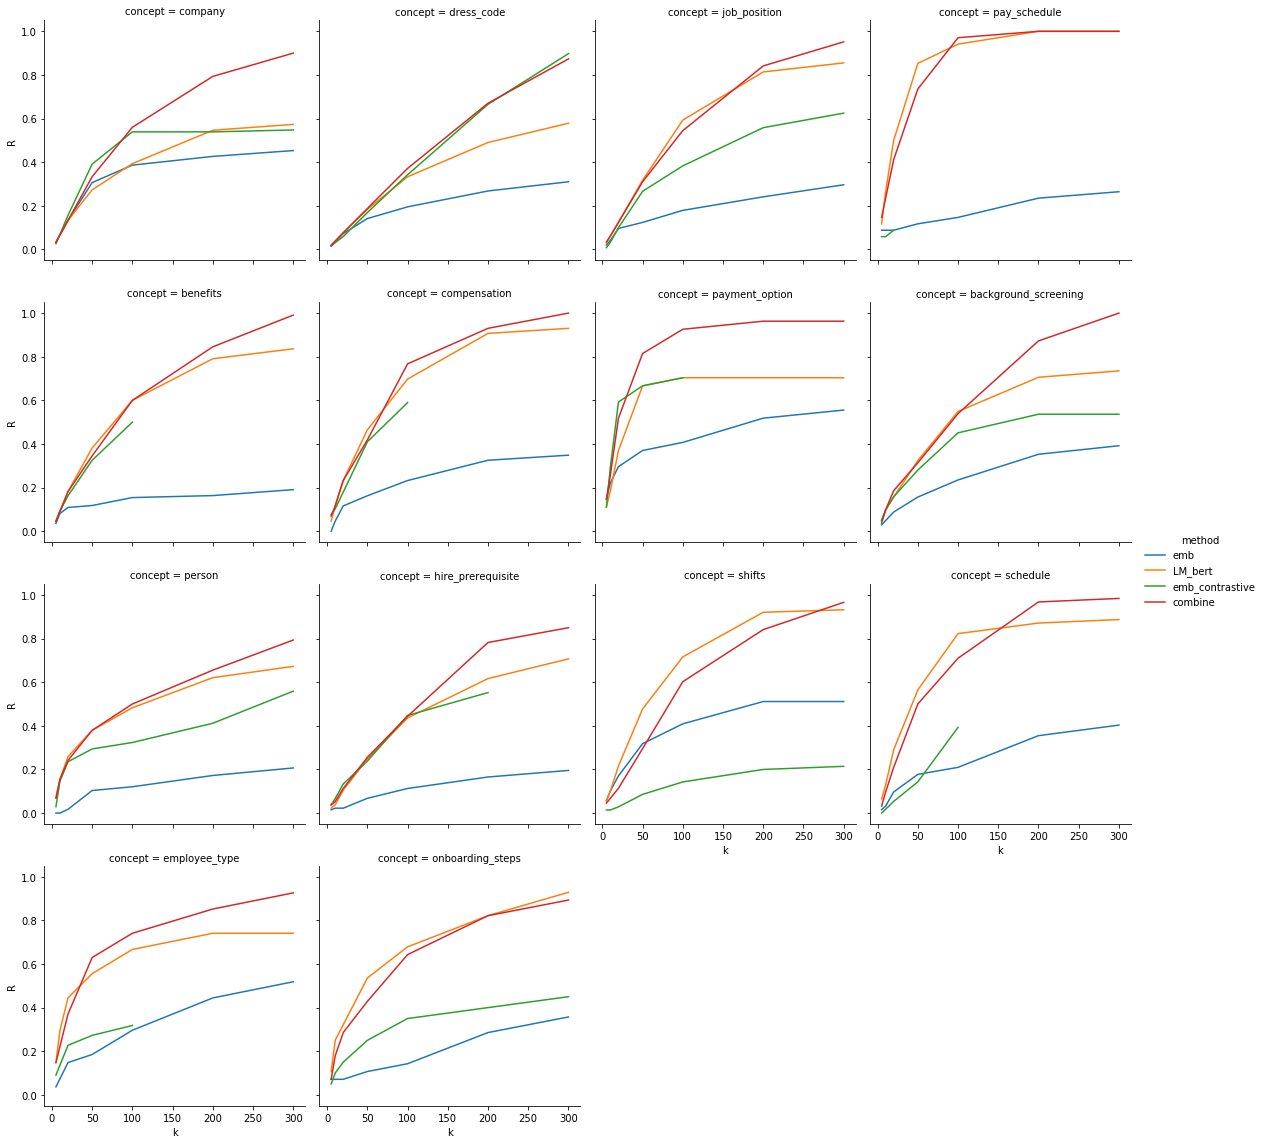

In [103]:
g = sns.FacetGrid(df, hue="method", col="concept", col_wrap=4, height=4)
g.map(lineplot, "k", "R")
g.add_legend()

## MRR

In [117]:
df_pivot = pivot_df(df, "MRR", "concept", "method")

In [118]:
print(df_pivot)

method                 LM_bert   combine       emb  emb_contrastive
concept                                                            
background_screening  0.042426  0.044436  0.027361         0.027934
benefits              0.043641  0.043779  0.028297         0.040404
company               0.031817  0.035610  0.031118         0.036896
compensation          0.042034  0.045489  0.014443         0.037937
dress_code            0.021062  0.022980  0.017274         0.020881
employee_type         0.106641  0.106598  0.030641         0.034485
hire_prerequisite     0.028595  0.033125  0.014006         0.028029
job_position          0.034267  0.034826  0.022268         0.018394
onboarding_steps      0.084689  0.082622  0.056835         0.065881
pay_schedule          0.108863  0.105861  0.054007         0.017135
payment_option        0.070439  0.091091  0.087743         0.075454
person                0.060175  0.061735  0.004352         0.038527
schedule              0.061235  0.049807  0.0273

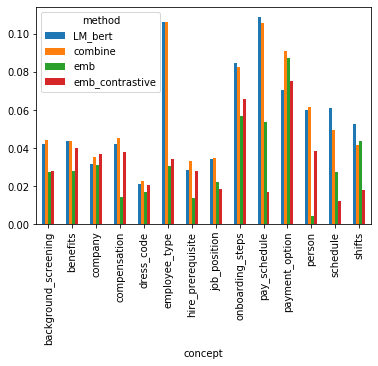

In [119]:
df_pivot.plot(kind="bar")

# Group Wise Avg. Precision

## Easy vs Hard

In [107]:
easy = ['company','dress_code','benefits','job_position','employee_type']
hard = ['background_screening', 'compensation', 'hire_prerequisite','onboarding_steps','payment_option','person','schedule','shifts']

In [108]:
df['difficulty'] = df.apply (lambda row: 'easy' if row['concept'] in easy else 'hard', axis=1)

In [109]:
print(df)

              concept   method       MRR         P         R        F1    k  \
0             company      emb  0.031118  1.000000  0.033333  0.064516    5   
1             company      emb  0.031118  1.000000  0.066667  0.125000   10   
2             company      emb  0.031118  1.000000  0.133333  0.235294   20   
3             company      emb  0.031118  0.920000  0.306667  0.460000   50   
4             company      emb  0.031118  0.580000  0.386667  0.464000  100   
..                ...      ...       ...       ...       ...       ...  ...   
372  onboarding_steps  combine  0.082622  0.400000  0.285714  0.333333   20   
373  onboarding_steps  combine  0.082622  0.240000  0.428571  0.307692   50   
374  onboarding_steps  combine  0.082622  0.180000  0.642857  0.281250  100   
375  onboarding_steps  combine  0.082622  0.115000  0.821429  0.201754  200   
376  onboarding_steps  combine  0.082622  0.083333  0.892857  0.152439  300   

    difficulty  
0         easy  
1         easy  


In [120]:
df_pivot_difficulty = pivot_df(df, "P", "difficulty", "method")

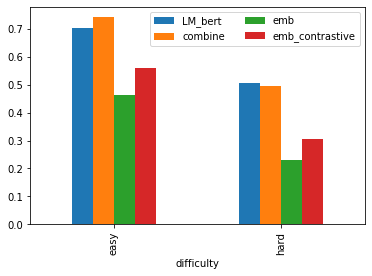

In [121]:
df_pivot_difficulty.plot(kind="bar").legend(loc='upper right',ncol=2)